In [1]:
import pandas as pd

from nltk.stem import WordNetLemmatizer , PorterStemmer

from nltk.corpus import stopwords

from collections import Counter

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression as LR

from sklearn.metrics import accuracy_score as accuracy , confusion_matrix as matrix,ConfusionMatrixDisplay as display , f1_score ,recall_score as recall, precision_score as precision 

In [3]:
from sklearn.tree import DecisionTreeClassifier 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [142]:
from wordcloud import WordCloud

In [143]:
lemmatize = WordNetLemmatizer().lemmatize

stem = PorterStemmer().stem

stop_words = stopwords.words('english')


## Importing Data

In [144]:
data = pd.read_csv("email_data.csv")

data.loc[data["Category"] == 'spam' , "Category"] = 0

data.loc[data["Category"] == 'ham' , "Category"] = 1

category = data["Category"]

Text(0.5, 1.0, 'SPAM WORD CLOUD')

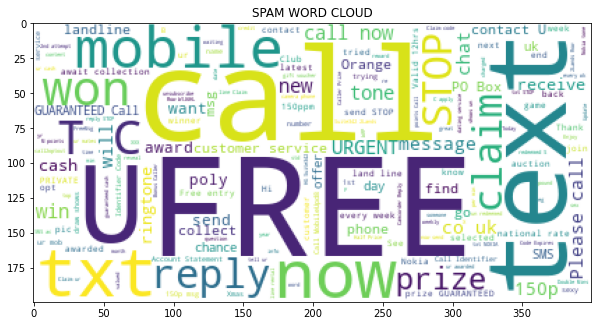

In [145]:
spam_str = ' '.join(data['Message'].loc[data["Category"] == 0])

spam_cloud = WordCloud(collocations = 'False', background_color = 'black').generate(spam_str)
plt.figure(figsize=(10,15))
plt.imshow(spam_cloud)
plt.title("SPAM WORD CLOUD")


Text(0.5, 1.0, 'HAM WORD CLOUD')

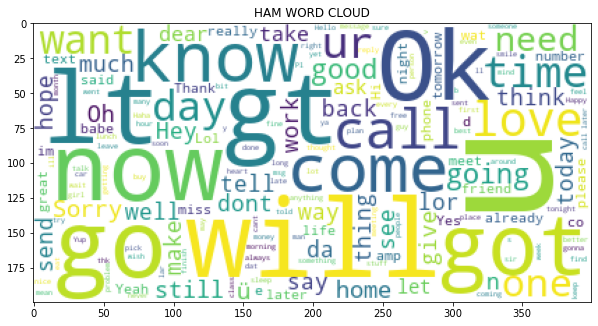

In [146]:
ham_str = ' '.join(data["Message"].loc[data['Category'] == 1])

ham_cloud = WordCloud(collocations = 'False', background_color = 'White').generate(ham_str)
plt.figure(figsize=(10,15))
plt.imshow(ham_cloud)
plt.title("HAM WORD CLOUD")

## Preprocessing data


In [147]:
msgs = []

for msg in data["Message"]:
    
    tokens = [stem(lemmatize(word)) for word in msg.lower().split() if word not in stop_words]
    
    tokens = dict(Counter(tokens)).keys()
    
    msgs.append(' '.join(tokens))
    

## Splitting Data to Train and Test 

In [148]:
train_ds_msg , test_ds_msg , train_ds_cate , test_ds_cate = train_test_split(msgs , category , random_state = 5 , test_size = .2)

print(len(train_ds_msg))

print(len(test_ds_msg))

print(train_ds_cate.shape)

print(test_ds_cate.shape)

4457
1115
(4457,)
(1115,)


## Transforming Data

In [149]:
transform = TfidfVectorizer()

train_trans_msg = transform.fit_transform(train_ds_msg)

test_trans_msg = transform.transform(test_ds_msg)

train_trans_cate = train_ds_cate.astype('int')

test_trans_cate = test_ds_cate.astype('int')

In [150]:
visualize={}

## Logistic Regression Model

In [151]:
model = LR()
model

LogisticRegression()

In [152]:
model.fit(train_trans_msg , train_trans_cate)

LogisticRegression()

#### L R preformance

Training Data Results : 
Training data accuracy_score :  0.9681400044873233
Training data precision_score :  0.9987029831387808
Training data f1_score :  0.9818923743942872
Training data recall_score :  0.9656383245548031

Test Data Results : 
test data accuracy_score :  0.9623318385650225
test data precision_score :  0.9989690721649485
test data f1_score :  0.9787878787878788
test data recall_score :  0.9594059405940594


 Confusion Matrix : 

[[104   1]
 [ 41 969]]


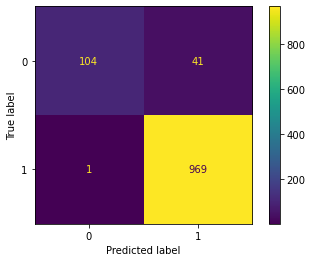

In [153]:
train_prediction = model.predict(train_trans_msg)

train_accuracy = accuracy(train_prediction , train_trans_cate)
train_precision = precision(train_prediction , train_trans_cate)
train_f1_score = f1_score(train_prediction , train_trans_cate)
train_recall = recall(train_prediction , train_trans_cate)

print("Training Data Results : ")

print("Training data accuracy_score : " , train_accuracy)
print("Training data precision_score : " , train_precision)
print("Training data f1_score : " , train_f1_score)
print("Training data recall_score : " , train_recall)

test_prediction = model.predict(test_trans_msg)

test_accuracy = accuracy(test_prediction , test_trans_cate)
test_precision = precision(test_prediction , test_trans_cate)
test_f1_score= f1_score(test_prediction , test_trans_cate)
test_recall = recall(test_prediction , test_trans_cate)

print("\nTest Data Results : ")

print("test data accuracy_score : " , test_accuracy)
print("test data precision_score : " , test_precision)
print("test data f1_score : " , test_f1_score)
print("test data recall_score : " , test_recall)

visualize["LR model"]={'accuracy' : test_accuracy  , 
                         'precision' : test_precision , 
                         'f1_score' : test_f1_score, 
                         'recall' : test_recall
                       }
print("\n\n Confusion Matrix : \n")
print(matrix(test_prediction , test_trans_cate))
mat = matrix(test_trans_cate , test_prediction)
dis = display(confusion_matrix = mat,display_labels = KNNmodel.classes_)
dis.plot()


## KNN model

In [154]:
KNNmodel = KNeighborsClassifier()

KNNmodel.fit(train_trans_msg , train_trans_cate)

KNeighborsClassifier()

#### KNN performance

Training Data Results : 
Training data accuracy_score :  0.9196769127215616
Training data precision_score :  1.0
Training data f1_score :  0.9556271690629647
Training data recall_score :  0.915024922857821

Test Data Results : 
test data accuracy_score :  0.9085201793721973
test data precision_score :  1.0
test data f1_score :  0.950048971596474
test data recall_score :  0.9048507462686567


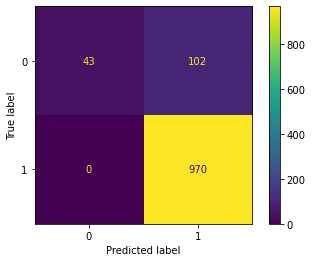

In [155]:
train_prediction = KNNmodel.predict(train_trans_msg)

train_accuracy = accuracy(train_prediction , train_trans_cate)
train_precision = precision(train_prediction , train_trans_cate)
train_f1_score = f1_score(train_prediction , train_trans_cate)
train_recall = recall(train_prediction , train_trans_cate)

print("Training Data Results : ")

print("Training data accuracy_score : " , train_accuracy)
print("Training data precision_score : " , train_precision)
print("Training data f1_score : " , train_f1_score)
print("Training data recall_score : " , train_recall)

test_prediction = KNNmodel.predict(test_trans_msg)

test_accuracy = accuracy(test_prediction , test_trans_cate)
test_precision = precision(test_prediction , test_trans_cate)
test_f1_score= f1_score(test_prediction , test_trans_cate)
test_recall = recall(test_prediction , test_trans_cate)

print("\nTest Data Results : ")

print("test data accuracy_score : " , test_accuracy)
print("test data precision_score : " , test_precision)
print("test data f1_score : " , test_f1_score)
print("test data recall_score : " , test_recall)

visualize["KNN model"]={'accuracy' : test_accuracy  , 
                         'precision' : test_precision , 
                         'f1_score' : test_f1_score, 
                         'recall' : test_recall
                       }
mat = matrix(test_trans_cate , test_prediction)
dis = display(confusion_matrix = mat)
dis.plot()


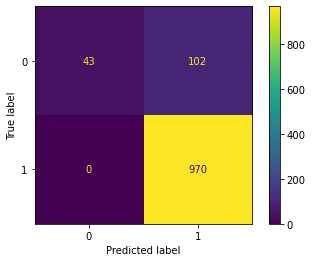

In [156]:
mat = matrix(test_trans_cate , test_prediction)
dis = display(confusion_matrix = mat,display_labels = KNNmodel.classes_)
dis.plot()

### DecisionTreeClassifier Model

In [157]:
DTCmodel = DecisionTreeClassifier()

DTCmodel.fit(train_trans_msg , train_trans_cate)


DecisionTreeClassifier()

Training Data Results : 
Training data accuracy_score :  1.0
Training data precision_score :  1.0
Training data f1_score :  1.0
Training data recall_score :  1.0

Test Data Results : 
test data accuracy_score :  0.9623318385650225
test data precision_score :  0.9835051546391752
test data f1_score :  0.9784615384615385
test data recall_score :  0.9734693877551021


 Confusion Matrix : 

[[119  16]
 [ 26 954]]


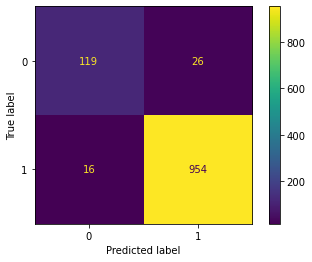

In [158]:
train_prediction = DTCmodel.predict(train_trans_msg)

train_accuracy = accuracy(train_prediction , train_trans_cate)
train_precision = precision(train_prediction , train_trans_cate)
train_f1_score = f1_score(train_prediction , train_trans_cate)
train_recall = recall(train_prediction , train_trans_cate)

print("Training Data Results : ")

print("Training data accuracy_score : " , train_accuracy)
print("Training data precision_score : " , train_precision)
print("Training data f1_score : " , train_f1_score)
print("Training data recall_score : " , train_recall)

test_prediction = DTCmodel.predict(test_trans_msg)

test_accuracy = accuracy(test_prediction , test_trans_cate)
test_precision = precision(test_prediction , test_trans_cate)
test_f1_score= f1_score(test_prediction , test_trans_cate)
test_recall = recall(test_prediction , test_trans_cate)

print("\nTest Data Results : ")

print("test data accuracy_score : " , test_accuracy)
print("test data precision_score : " , test_precision)
print("test data f1_score : " , test_f1_score)
print("test data recall_score : " , test_recall)

visualize["DTC model"]={'accuracy' : test_accuracy  , 
                         'precision' : test_precision , 
                         'f1_score' : test_f1_score, 
                         'recall' : test_recall
                       }

print("\n\n Confusion Matrix : \n")
print(matrix(test_prediction , test_trans_cate))
mat = matrix(test_trans_cate , test_prediction)
dis = display(confusion_matrix = mat,display_labels = KNNmodel.classes_)
dis.plot()

### NB Model

In [159]:
NB_model = GaussianNB()
NB_model.fit(train_trans_msg.toarray() , train_trans_cate)

GaussianNB()

Training Data Results : 
Training data accuracy_score :  0.9342607134844065
Training data precision_score :  0.9239948119325552
Training data f1_score :  0.9604961574760685
Training data recall_score :  1.0

Test Data Results : 
test data accuracy_score :  0.8941704035874439
test data precision_score :  0.8938144329896908
test data f1_score :  0.9362850971922246
test data recall_score :  0.9829931972789115


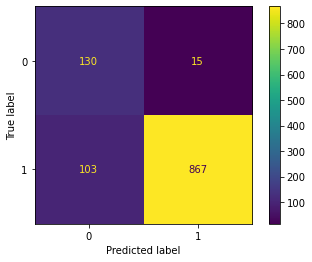

In [160]:
train_prediction = NB_model.predict(train_trans_msg.toarray())

train_accuracy = accuracy(train_prediction , train_trans_cate)
train_precision = precision(train_prediction , train_trans_cate)
train_f1_score = f1_score(train_prediction , train_trans_cate)
train_recall = recall(train_prediction , train_trans_cate)

print("Training Data Results : ")

print("Training data accuracy_score : " , train_accuracy)
print("Training data precision_score : " , train_precision)
print("Training data f1_score : " , train_f1_score)
print("Training data recall_score : " , train_recall)

test_prediction = NB_model.predict(test_trans_msg.toarray())

test_accuracy = accuracy(test_prediction , test_trans_cate)
test_precision = precision(test_prediction , test_trans_cate)
test_f1_score= f1_score(test_prediction , test_trans_cate)
test_recall = recall(test_prediction , test_trans_cate)

print("\nTest Data Results : ")

print("test data accuracy_score : " , test_accuracy)
print("test data precision_score : " , test_precision)
print("test data f1_score : " , test_f1_score)
print("test data recall_score : " , test_recall)

visualize["NB model"]={'accuracy' : test_accuracy  , 
                         'precision' : test_precision , 
                         'f1_score' : test_f1_score, 
                         'recall' : test_recall
                       }

mat = matrix(test_trans_cate , test_prediction)
dis = display(confusion_matrix = mat,display_labels = KNNmodel.classes_)
dis.plot()

### Random Forest Classifier

In [161]:
RFC_model = RandomForestClassifier()
RFC_model.fit(train_trans_msg , train_trans_cate)

RandomForestClassifier()

Training Data Results : 
Training data accuracy_score :  1.0
Training data precision_score :  1.0
Training data f1_score :  1.0
Training data recall_score :  1.0

Test Data Results : 
test data accuracy_score :  0.9847533632286996
test data precision_score :  0.9989690721649485
test data f1_score :  0.9913043478260869
test data recall_score :  0.983756345177665


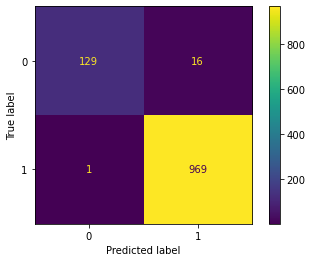

In [162]:
train_prediction = RFC_model.predict(train_trans_msg)

train_accuracy = accuracy(train_prediction , train_trans_cate)
train_precision = precision(train_prediction , train_trans_cate)
train_f1_score = f1_score(train_prediction , train_trans_cate)
train_recall = recall(train_prediction , train_trans_cate)

print("Training Data Results : ")

print("Training data accuracy_score : " , train_accuracy)
print("Training data precision_score : " , train_precision)
print("Training data f1_score : " , train_f1_score)
print("Training data recall_score : " , train_recall)

test_prediction = RFC_model.predict(test_trans_msg)

test_accuracy = accuracy(test_prediction , test_trans_cate)
test_precision = precision(test_prediction , test_trans_cate)
test_f1_score= f1_score(test_prediction , test_trans_cate)
test_recall = recall(test_prediction , test_trans_cate)

print("\nTest Data Results : ")

print("test data accuracy_score : " , test_accuracy)
print("test data precision_score : " , test_precision)
print("test data f1_score : " , test_f1_score)
print("test data recall_score : " , test_recall)

visualize["RFC_model"]={'accuracy' : test_accuracy  , 
                         'precision' : test_precision , 
                         'f1_score' : test_f1_score, 
                         'recall' : test_recall
                       }

mat = matrix(test_trans_cate , test_prediction)
dis = display(confusion_matrix = mat,display_labels = KNNmodel.classes_)
dis.plot()

### Gradient Boosting Classifier

In [163]:
GBC_model = GradientBoostingClassifier()
GBC_model.fit(train_trans_msg , train_trans_cate)

GradientBoostingClassifier()

Training Data Results : 
Training data accuracy_score :  0.9811532420910927
Training data precision_score :  0.9979247730220493
Training data f1_score :  0.9892003085626125
Training data recall_score :  0.9806270711190416

Test Data Results : 
test data accuracy_score :  0.9614349775784753
test data precision_score :  0.9938144329896907
test data f1_score :  0.9781836631151699
test data recall_score :  0.9630369630369631


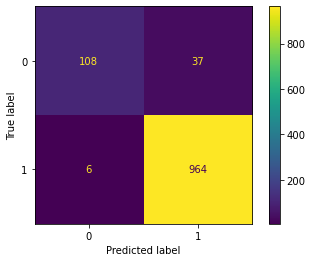

In [164]:
train_prediction = GBC_model.predict(train_trans_msg)

train_accuracy = accuracy(train_prediction , train_trans_cate)
train_precision = precision(train_prediction , train_trans_cate)
train_f1_score = f1_score(train_prediction , train_trans_cate)
train_recall = recall(train_prediction , train_trans_cate)

print("Training Data Results : ")

print("Training data accuracy_score : " , train_accuracy)
print("Training data precision_score : " , train_precision)
print("Training data f1_score : " , train_f1_score)
print("Training data recall_score : " , train_recall)

test_prediction = GBC_model.predict(test_trans_msg)

test_accuracy = accuracy(test_prediction , test_trans_cate)
test_precision = precision(test_prediction , test_trans_cate)
test_f1_score= f1_score(test_prediction , test_trans_cate)
test_recall = recall(test_prediction , test_trans_cate)

print("\nTest Data Results : ")

print("test data accuracy_score : " , test_accuracy)
print("test data precision_score : " , test_precision)
print("test data f1_score : " , test_f1_score)
print("test data recall_score : " , test_recall)

visualize["GBC model"]={'accuracy' : test_accuracy  , 
                         'precision' : test_precision , 
                         'f1_score' : test_f1_score, 
                         'recall' : test_recall
                       }

mat = matrix(test_trans_cate , test_prediction)
dis = display(confusion_matrix = mat,display_labels = KNNmodel.classes_)
dis.plot()

### SVM model

In [165]:
svm_model = SVC()
svm_model.fit(train_trans_msg , train_trans_cate)

SVC()

Training Data Results : 
Training data accuracy_score :  0.9975319721785955
Training data precision_score :  1.0
Training data f1_score :  0.9985753140784872
Training data recall_score :  0.9971546818416969

Test Data Results : 
test data accuracy_score :  0.9820627802690582
test data precision_score :  1.0
test data f1_score :  0.989795918367347
test data recall_score :  0.9797979797979798


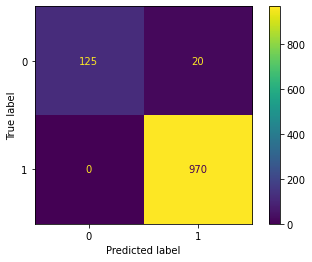

In [166]:
train_prediction = svm_model.predict(train_trans_msg)

train_accuracy = accuracy(train_prediction , train_trans_cate)
train_precision = precision(train_prediction , train_trans_cate)
train_f1_score = f1_score(train_prediction , train_trans_cate)
train_recall = recall(train_prediction , train_trans_cate)

print("Training Data Results : ")

print("Training data accuracy_score : " , train_accuracy)
print("Training data precision_score : " , train_precision)
print("Training data f1_score : " , train_f1_score)
print("Training data recall_score : " , train_recall)

test_prediction = svm_model.predict(test_trans_msg)

test_accuracy = accuracy(test_prediction , test_trans_cate)
test_precision = precision(test_prediction , test_trans_cate)
test_f1_score= f1_score(test_prediction , test_trans_cate)
test_recall = recall(test_prediction , test_trans_cate)

print("\nTest Data Results : ")

print("test data accuracy_score : " , test_accuracy)
print("test data precision_score : " , test_precision)
print("test data f1_score : " , test_f1_score)
print("test data recall_score : " , test_recall)

visualize["svm model"]={'accuracy' : test_accuracy  , 
                         'precision' : test_precision , 
                         'f1_score' : test_f1_score, 
                         'recall' : test_recall
                       }

mat = matrix(test_trans_cate , test_prediction)
dis = display(confusion_matrix = mat,display_labels = KNNmodel.classes_)
dis.plot()

## Visualization of different models

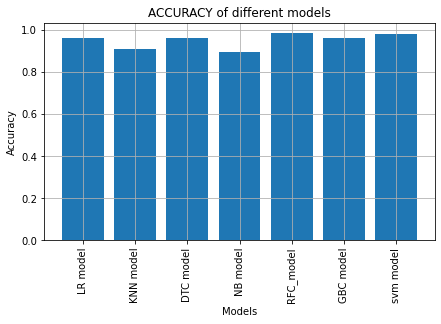

In [181]:
plt.figure(figsize=(7,4))
plt.bar(visualize.keys() , [i['accuracy'] for i in visualize.values()])
plt.title("ACCURACY of different models")
plt.xticks(rotation = 'vertical')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

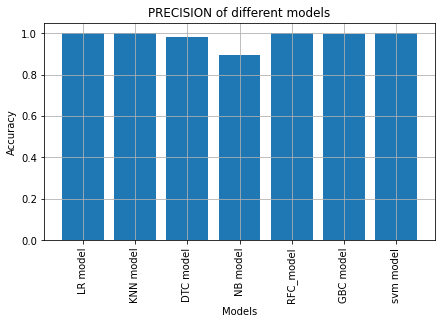

In [182]:


plt.figure(figsize=(7,4))
plt.bar(visualize.keys() , [i['precision'] for i in visualize.values()])
plt.title("PRECISION of different models")
plt.xticks(rotation = 'vertical')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

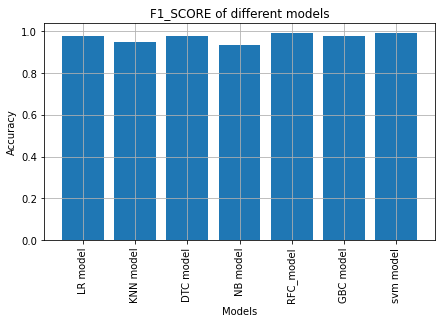

In [180]:
plt.figure(figsize=(7,4))
plt.bar(visualize.keys() , [i['f1_score'] for i in visualize.values()])
plt.title("F1_SCORE of different models")
plt.xticks(rotation = 'vertical')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

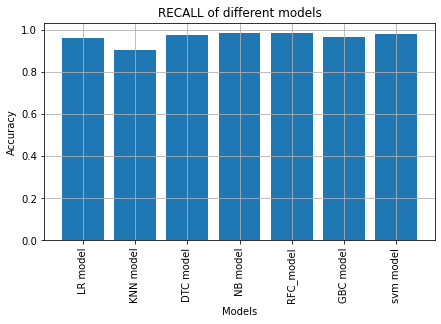

In [179]:
plt.figure(figsize=(7,4))
plt.bar(visualize.keys() , [i['recall'] for i in visualize.values()] )
plt.xticks(rotation = 'vertical')
plt.title("RECALL of different models")
plt.xlabel("Models" )
plt.ylabel("Accuracy")
plt.grid()
plt.show()

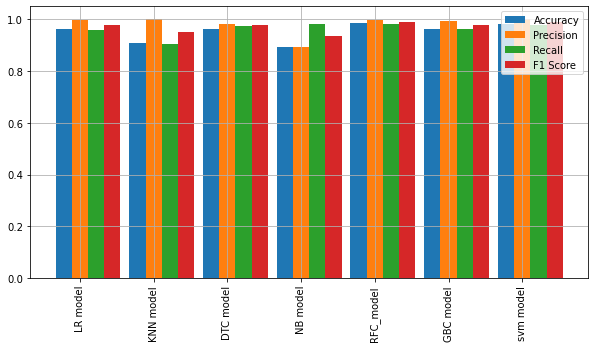

In [183]:
accuracies = [visualize[i]['accuracy'] for i in visualize.keys()]
precisions = [visualize[i]['precision'] for i in visualize.keys()]
re_call = [visualize[i]['recall'] for i in visualize.keys()]
f1score = [visualize[i]['f1_score'] for i in visualize.keys()]

index = np.arange(len(visualize))
bar_width = .22

plt.figure(figsize=(10,5))

plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, re_call, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1score, bar_width, label='F1 Score')

plt.xticks(index + bar_width, list(visualize.keys()))
plt.grid()
plt.legend()
plt.xticks(rotation = 'vertical')

plt.show()

## preprocess function


In [172]:
def preprocess(mail) : 
    
    tokens = [stem(lemmatize(word)) for word in mail.lower().split() if word not in stop_words]
    
    tokens = dict(Counter(tokens)).keys()
    
    return ' '.join(tokens)

In [1]:
text = input()

data = transform.transform([preprocess(text)])
print(type(data))

predict = RFC_model.predict(data)[0]

if predict : 
    print("\n HAM MAIL")
else:
    print("\n SPAM MAIL")

    


FreeMsg Hey there darling it's been 3 week's n...


NameError: name 'transform' is not defined

In [65]:
data.head(10)

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
5,0,FreeMsg Hey there darling it's been 3 week's n...
6,1,Even my brother is not like to speak with me. ...
7,1,As per your request 'Melle Melle (Oru Minnamin...
8,0,WINNER!! As a valued network customer you have...
9,0,Had your mobile 11 months or more? U R entitle...
